# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re


In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,✅ Trip Verified | Probably the worst business ...
4,"✅ Trip Verified | Definitely not recommended, ..."


In [10]:
df.to_csv("C:/Users/Bameri/Desktop/BA_reviews")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [11]:
df

,reviews
0,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,✅ Trip Verified | Probably the worst business ...
4,"✅ Trip Verified | Definitely not recommended, ..."
...,...
995,✅ Trip Verified | Naples to Gatwick. The onlin...
996,✅ Trip Verified | I have been flying with BA f...
997,✅ Trip Verified | I traveled on British Airway...
998,✅ Trip Verified | Flew British Airways from Bu...


In [14]:
df.replace(re.compile(r'\s*✅ Trip Verified \|\s*'), '', inplace=True)
df

,reviews
0,Flew ATL to LHR 8th Jan 2023. Was unlucky enou...
1,Not Verified | Great thing about British Airw...
2,Not Verified | The staff are friendly. The pla...
3,Probably the worst business class experience I...
4,"Definitely not recommended, especially for bus..."
...,...
995,Naples to Gatwick. The online check-in would n...
996,I have been flying with BA for the last 32 yea...
997,I traveled on British Airways with my wife fro...
998,Flew British Airways from Budapest to London H...


In [15]:
df.replace(re.compile(r'\s*Not Verified \|\s*'), '', inplace=True)
df

,reviews
0,Flew ATL to LHR 8th Jan 2023. Was unlucky enou...
1,Great thing about British Airways A380 is the ...
2,"The staff are friendly. The plane was cold, we..."
3,Probably the worst business class experience I...
4,"Definitely not recommended, especially for bus..."
...,...
995,Naples to Gatwick. The online check-in would n...
996,I have been flying with BA for the last 32 yea...
997,I traveled on British Airways with my wife fro...
998,Flew British Airways from Budapest to London H...


In [16]:
df.to_csv("C:/Users/Bameri/Desktop/BA_reviews_Clean")

In [20]:
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

In [8]:
#! pip install pillow
#! pip install WordCloud
#!pip install wordcloud -version-compatible-operatingsystem
! pip install --upgrade
! pip install wordcloud



ERROR: You must give at least one requirement to install (see "pip help install")


  Using cached wordcloud-1.8.2.2.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  DEPRECATION: wordcloud is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  Running setup.py install for wordcloud did not run successfully.
  exit code: 1
  
  [22 lines of output]
  running install
  C:\PIP\v1\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-am

In [8]:
sentiment_analysis_df = pd.read_csv(r"C:\Users\Bameri\Desktop\BA_Projrct\BA_reviews_Clean.csv")

In [9]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df

,Unnamed: 0,reviews,SENTIMENT
0,0,Flew ATL to LHR 8th Jan 2023. Was unlucky enou...,-0.9845
1,1,Great thing about British Airways A380 is the ...,0.9382
2,2,"The staff are friendly. The plane was cold, we...",0.3118
3,3,Probably the worst business class experience I...,-0.9943
4,4,"Definitely not recommended, especially for bus...",-0.7000
...,...,...,...
995,995,Naples to Gatwick. The online check-in would n...,-0.7153
996,996,I have been flying with BA for the last 32 yea...,-0.9815
997,997,I traveled on British Airways with my wife fro...,-0.8352
998,998,Flew British Airways from Budapest to London H...,0.9263


In [41]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bameri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

In [5]:
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

NameError: name 'sentiment_analysis_df' is not defined

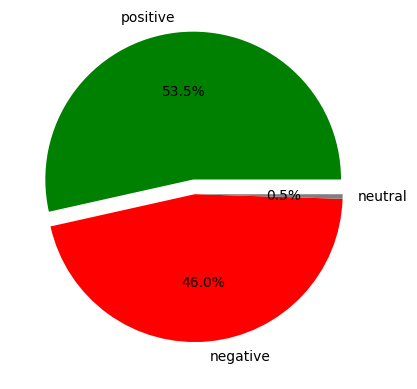

In [38]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()
# Out of 1000 reviews, 535 were positive, 460 were negative and 5 were neutral. This means the majority of reviews were polarised as either positive or negative



In [4]:
sentiment_analysis_df.to_csv(r"C:\Users\Bameri\Desktop\BA_Projrct\BA_sentiment_analysis_df.csv")


NameError: name 'sentiment_analysis_df' is not defined

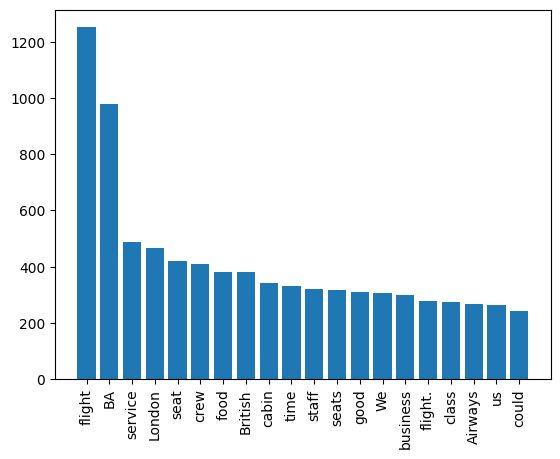

In [42]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = sentiment_analysis_df['reviews']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()
# The frequency chart below shows that the key topics within the reviews include “flight”, “London”, “seat” and “crew”, showing that people are actively talking about their experience and staff

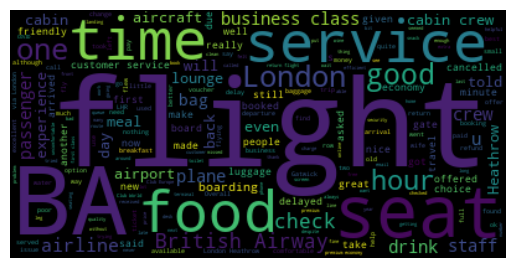

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(sentiment_analysis_df['reviews']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()